In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from bcb import sgs


In [3]:
df = pd.read_csv('1hour.csv')
# Caminho para o arquivo Parquet
# caminho_arquivo = 'BTC-BRL.parquet'

# Lendo o arquivo Parquet
# tabela = pq.read_table(caminho_arquivo)

# Convertendo a tabela em um DataFrame do Pandas
# df = tabela.to_pandas()
dfj = pd.read_excel('juros.xlsx')


In [4]:
dfj

,Data,Abertura,Máxima,Mínima,Fechamento
0,2023-08-29 17:00:00,12.390,12.400,12.390,12.400
1,2023-08-29 16:00:00,12.395,12.395,12.390,12.395
2,2023-08-29 15:00:00,12.395,12.400,12.390,12.395
3,2023-08-29 14:00:00,12.400,12.400,12.390,12.390
4,2023-08-29 13:00:00,12.395,12.400,12.395,12.395
...,...,...,...,...,...
9995,2018-08-10 15:00:00,11.280,11.420,11.280,11.410
9996,2018-08-10 14:00:00,11.280,11.280,11.260,11.270
9997,2018-08-10 13:00:00,11.300,11.300,11.240,11.260
9998,2018-08-10 12:00:00,11.280,11.310,11.270,11.300


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51245 entries, 0 to 51244
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1502942400.0   51245 non-null  float64
 1   4261.48000000  51245 non-null  float64
 2   4313.62000000  51245 non-null  float64
 3   4261.32000000  51245 non-null  float64
 4   4308.83000000  51245 non-null  float64
 5   47.18100900    51245 non-null  float64
 6   1502945999999  51245 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 2.7 MB


In [162]:
df.columns = ["open time","open","high","low","close","volume","close time"]

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51245 entries, 0 to 51244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   open time   51245 non-null  float64
 1   open        51245 non-null  float64
 2   high        51245 non-null  float64
 3   low         51245 non-null  float64
 4   close       51245 non-null  float64
 5   volume      51245 non-null  float64
 6   close time  51245 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 2.7 MB


In [164]:
vet = list([])
for i in range(len(df)):
     x = df["open time"].iloc[i]
     dt_object = datetime.utcfromtimestamp(x)
     formatted_date = dt_object.strftime('%Y-%m-%d %H:%M:%S')
     vet.append(formatted_date)


In [165]:
df["data"]  =  vet
df["data"] = pd.to_datetime(df['data'])

In [166]:
df['data simp'] = df['data'].dt.strftime('%Y-%m-%d')
df = df.set_index('data simp', inplace=False)


In [167]:
# cdi = sgs.get({'CDI':12}, start='1970-01-01')
# ipca = sgs.get({'IPCA':433}, start='2005-01-01')

In [168]:
# ipca.info()

In [169]:

# ipca["data"] = ipca.index
# ipca["data"] = pd.to_datetime(ipca['data'])
# ipca["data"] =ipca["data"].dt.strftime('%Y-%m-%d')
# ipca = ipca.set_index("data")

In [170]:
# df["ipca"] = ipca["IPCA"]
# # df = df.dropna()
# df["ipca"] = df["ipca"].fillna(0)
# valor = None
# for i in range(len(df)):
#     if(df["ipca"].iloc[i] != 0):
#         valor = df["ipca"].iloc[i]
#     elif(df["ipca"].iloc[i] == 0):
#         df["ipca"].iloc[i] = valor 

In [171]:

# cdi["data"] = cdi.index
# cdi["data"] = pd.to_datetime(cdi['data'])
# cdi["data"] =cdi["data"].dt.strftime('%Y-%m-%d')
# cdi = cdi.set_index("data")


In [172]:
# df["cdi"] = cdi["CDI"]
# # df = df.dropna()
# df["cdi"] = df["cdi"].fillna(0)
# valor = None
# for i in range(len(df)):
#     if(df["cdi"].iloc[i] != 0):
#         valor = df["cdi"].iloc[i]
#     elif(df["cdi"].iloc[i] == 0):
#         df["cdi"].iloc[i] = valor 

In [173]:
df['VWAP'] = (df['close'] * df['volume']).cumsum() / df['volume'].cumsum()
df['Upper_Shadow'] = df['high'] - np.maximum(df['close'], df['open'])
df['Lower_Shadow'] = np.minimum(df['close'], df['open']) - df['low']
df['high2low'] = (df['high'] / df['low']).replace([np.inf, -np.inf, np.nan], 0.)
df["hlco ratio"] = ((df['high'] - df['low'])/(df['close']-df['open'])).replace([np.inf, -np.inf, np.nan], 0.)

In [174]:
df = df.dropna()

In [175]:
df = df.drop(columns=[df.columns[6],df.columns[0]])

In [176]:
vetor = list([])
for i in range(len(df)-1):
    if (i == len(df)):
        vetor.append(0)
    elif (df["close"].iloc[i+1]  <  df["close"].iloc[i]):
        vetor.append(0)
    elif (df["close"].iloc[i+1]  >  df["close"].iloc[i]): 
        vetor.append(1)
    else:
        vetor.append(0)

vetor.append(0)


In [177]:
df["signal"] = vetor
# df["signal"] = df["signal"].shift(1)
# df = df.dropna()

In [178]:
Y = df[df.index < "2022-01-01"]["signal"]
X = df[df.index < "2022-01-01"].loc[:, (df.columns != "signal")&(df.columns != "data")]#&(df.columns != "close time")&(df.columns != "mes ano")&(df.columns != "open time")]

X = pd.DataFrame(X)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [179]:
rf = RandomForestClassifier()
# rf = joblib.load('random_forest_model.joblib_1hour')
rf.fit(x_train,y_train)
predictrftest = rf.predict(x_test)
print(classification_report(y_test, predictrftest))



              precision    recall  f1-score   support

           0       0.51      0.51      0.51      5625
           1       0.53      0.53      0.53      5841

    accuracy                           0.52     11466
   macro avg       0.52      0.52      0.52     11466
weighted avg       0.52      0.52      0.52     11466



c:\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


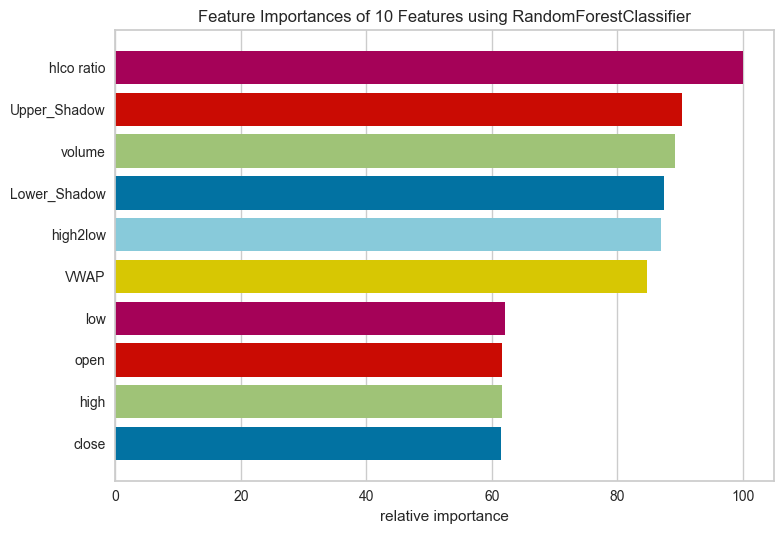

<AxesSubplot:title={'center':'Feature Importances of 10 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [180]:
viz = FeatureImportances(rf)
fig, ax = plt.subplots()
viz = FeatureImportances(rf, relative=True) 
viz.fit(x_train, y_train)
viz.poof()

In [181]:
df_aux = df[df.index >= "2022-01-01"]

In [182]:
K = df_aux["signal"]
Z = df_aux.loc[:, (df.columns != "signal")&(df.columns != "data")&(df.columns != "open_time")&(df.columns != "mes ano")]

In [183]:
df_aux["sinal modelo"] = rf.predict(Z)

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [184]:
df_aux["sinal modelo"].value_counts()

1    7998
0    5027
Name: sinal modelo, dtype: int64

In [185]:
df_aux["retorno"] = df_aux["close"].pct_change()
df_aux = df_aux.dropna()

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [186]:
rent = list([])
ultimo_valor=1
for i in range(len(df_aux)):
    if (df_aux["sinal modelo"].iloc[i] == 1):#&(df_aux["volume"].iloc[i] != 0)&(ultimo_valor == df_aux["sinal modelo"].iloc[i]):
        rent.append(df_aux["retorno"].iloc[i]-0.00009)
    elif (df_aux["sinal modelo"].iloc[i] == 0):#&(df_aux["volume"].iloc[i] != 0)&(ultimo_valor != df_aux["sinal modelo"].iloc[i]):
        rent.append(-df_aux["retorno"].iloc[i] -0.00018  )
    # elif (df_aux["sinal modelo"].iloc[i] == 1)&(df_aux["volume"].iloc[i] == 0):
    #     rent.append(0)
    # elif (df_aux["sinal modelo"].iloc[i] == 0):
    #     rent.append(df_aux["retorno"].iloc[i])

In [187]:
df_aux["retorno estrategia"] = rent

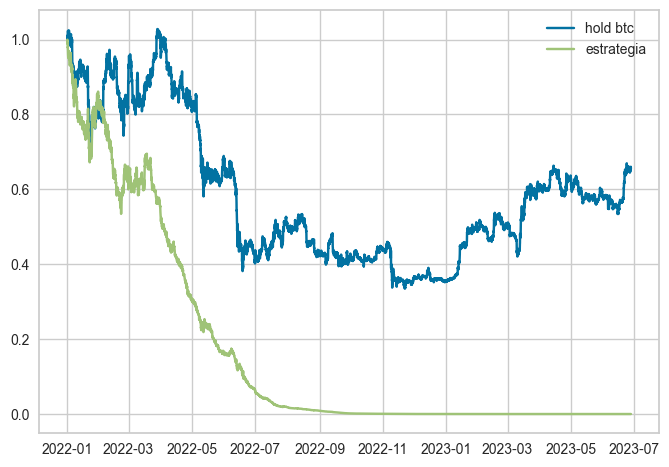

In [188]:
plt.plot(df_aux["data"], (df_aux["retorno"]+1).cumprod(), label="hold btc")
plt.plot(df_aux["data"], (df_aux["retorno estrategia"]+1).cumprod(), label="estrategia")
plt.legend()

In [189]:
# import joblib

# model_filename = 'random_forest_model_1hour.joblib'
# joblib.dump(rf, model_filename)